<a href="https://colab.research.google.com/github/Sarthak702-droid/Car-Price-Predection-using-Linear-Regression/blob/main/Car_price_predection_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import gradio as gr

In [ ]:
df = pd.read_csv("car dataset.csv")
df

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


**Dropping the unnecessary column**

In [ ]:
df.drop("v.id" , inplace = True , axis = 1)

In [ ]:
df.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
df.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [ ]:
df.isna().sum()

,0
on road old,0
on road now,0
years,0
km,0
rating,0
condition,0
economy,0
top speed,0
hp,0
torque,0


In [ ]:
df.duplicated().sum()

np.int64(0)

#Outliers detection using IQR

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
outliers = df[(df < lower_range) | (df > upper_range)]
outliers.sum()

,0
on road old,0.0
on road now,0.0
years,0.0
km,0.0
rating,0.0
condition,0.0
economy,0.0
top speed,0.0
hp,0.0
torque,0.0


**There is no outliers**

**Finding the Correlation Matrix and analysing it**


In [ ]:
df.corr()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
on road old,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238
torque,0.008950,0.017955,0.028859,0.013566,0.004408,0.047805,0.041632,-0.019697,-0.013817,1.000000,-0.002290


**Analysing Correlation using heatmap**

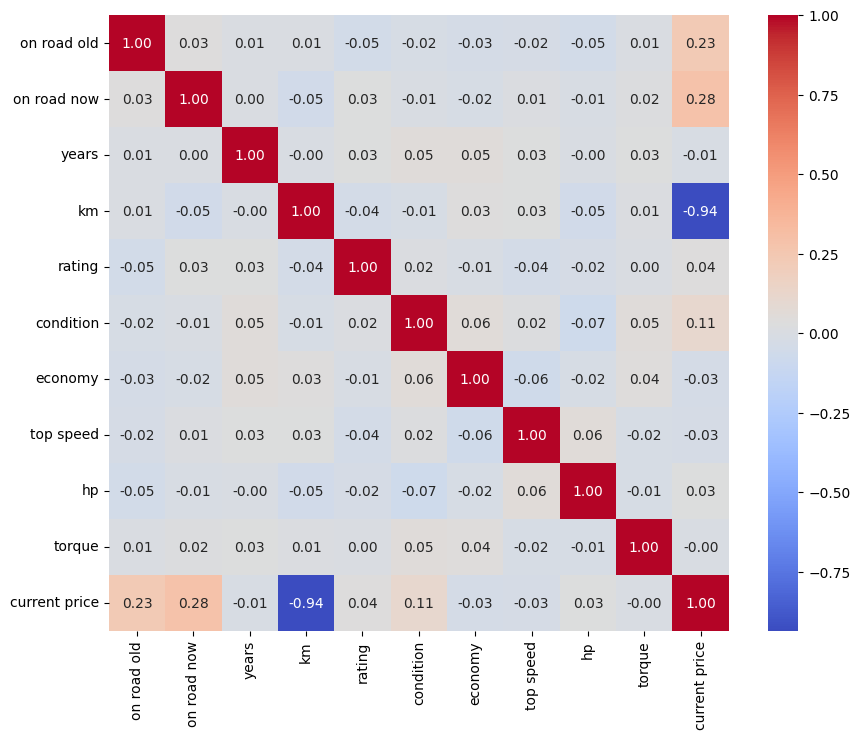

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True , cmap="coolwarm" , fmt = '.2f')
plt.show()

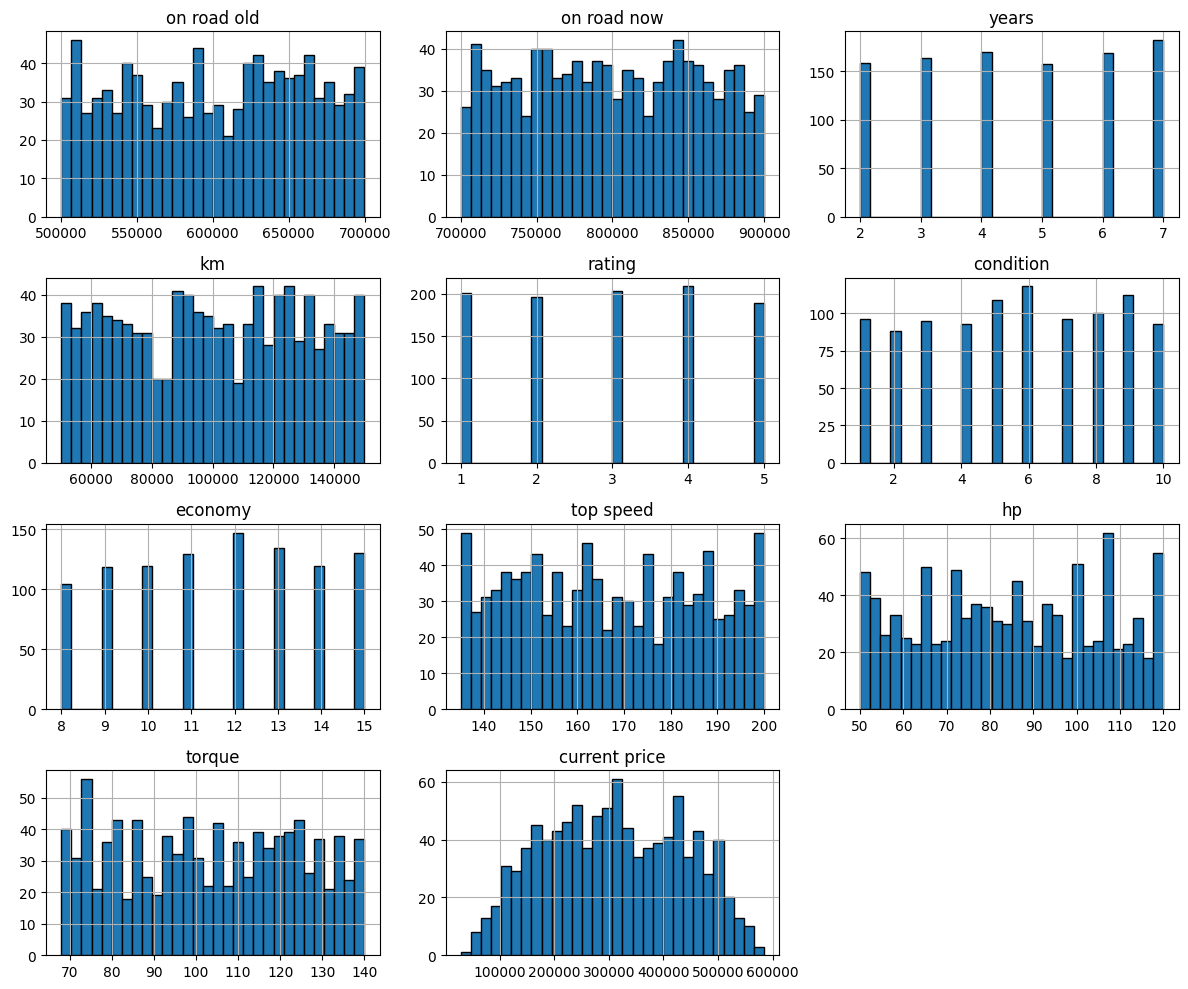

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

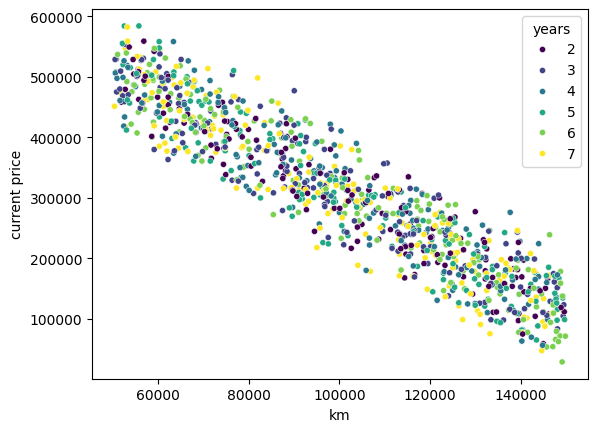

In [ ]:
sns.scatterplot(data = df , x = "km" ,y = "current price" , s = 20 , hue = "years" , palette='viridis')
plt.show()

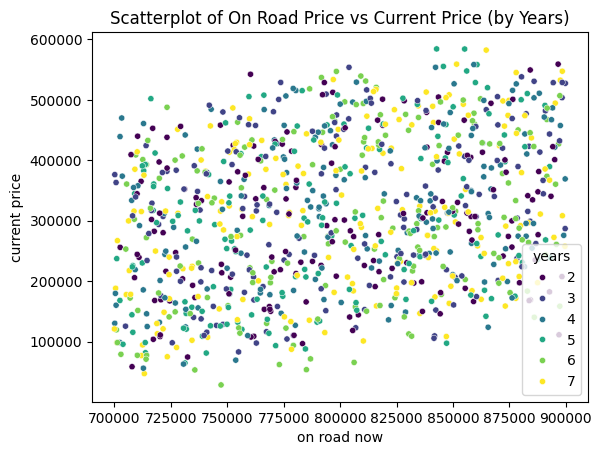

In [ ]:
sns.scatterplot(data = df , x = "on road now" ,y = "current price" , s = 20 , hue = "years" , palette='viridis')
plt.title("Scatterplot of On Road Price vs Current Price (by Years)")
plt.show()

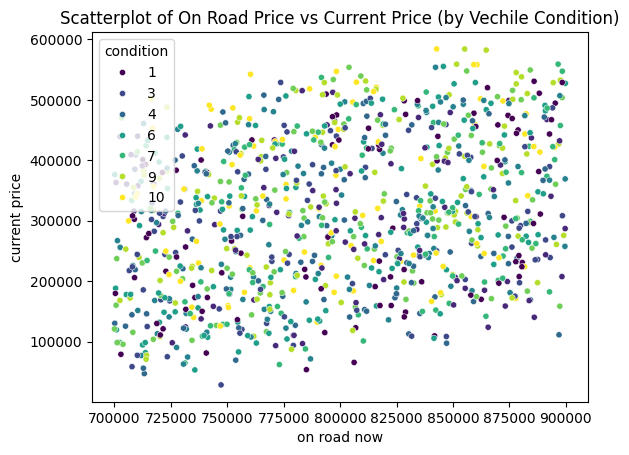

In [ ]:
sns.scatterplot(data = df , x = "on road now" ,y = "current price" , s = 20 , hue = "condition" , palette='viridis')
plt.title("Scatterplot of On Road Price vs Current Price (by Vechile Condition)")
plt.show()

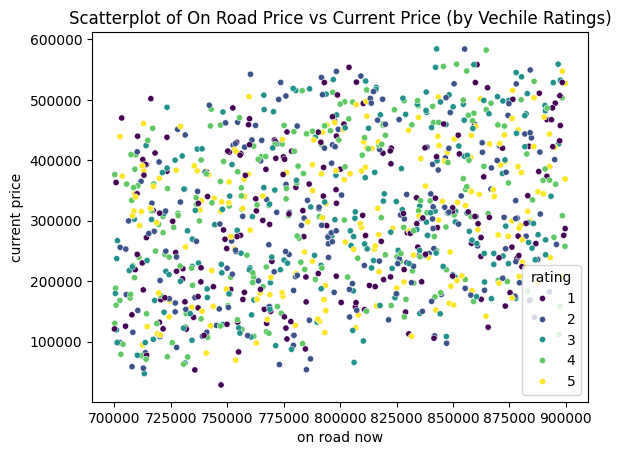

In [ ]:
sns.scatterplot(data = df , x = "on road now" ,y = "current price" , s = 20 , hue = "rating" , palette='viridis')
plt.title("Scatterplot of On Road Price vs Current Price (by Vechile Ratings)")
plt.show()

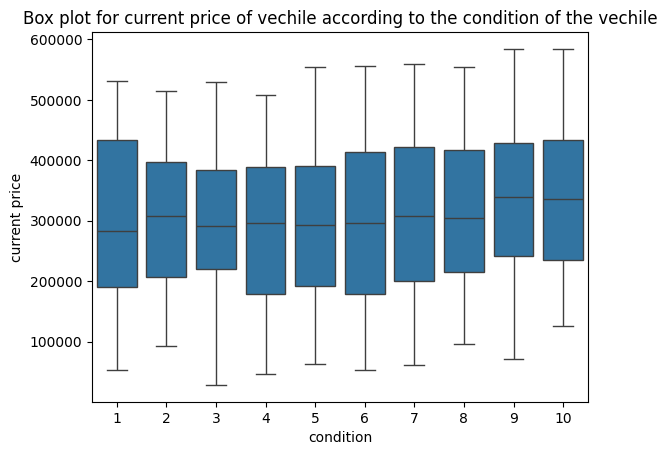

In [ ]:
sns.boxplot(data=df, x='condition', y='current price')
plt.title("Box plot for current price of vechile according to the condition of the vechile")
plt.show()

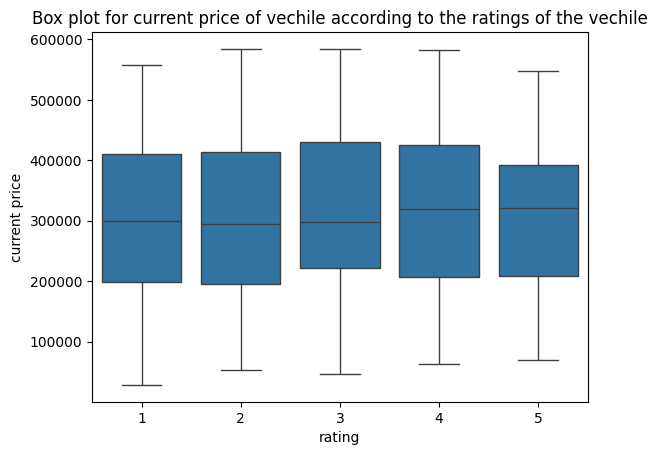

In [ ]:
sns.boxplot(data=df, x='rating', y='current price')
plt.title("Box plot for current price of vechile according to the ratings of the vechile")
plt.show()

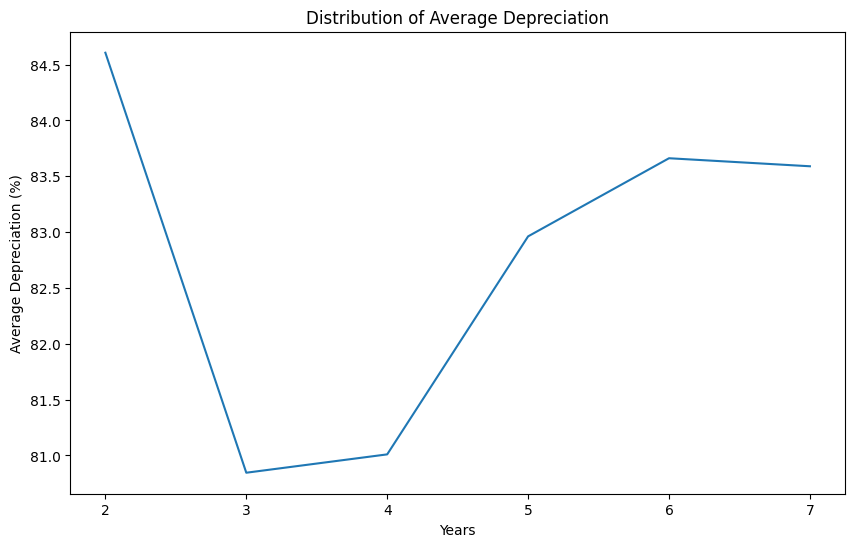

In [ ]:
avg_depreciation = ((df['on road now'] - df['current price']) / df['on road old'])*100
year_wise_avg_depreciation = avg_depreciation.groupby(df['years']).mean()
plt.figure(figsize=(10, 6))
plt.plot(year_wise_avg_depreciation.index , year_wise_avg_depreciation)
plt.title("Distribution of Average Depreciation")
plt.xlabel("Years")
plt.ylabel("Average Depreciation (%)")
plt.show()

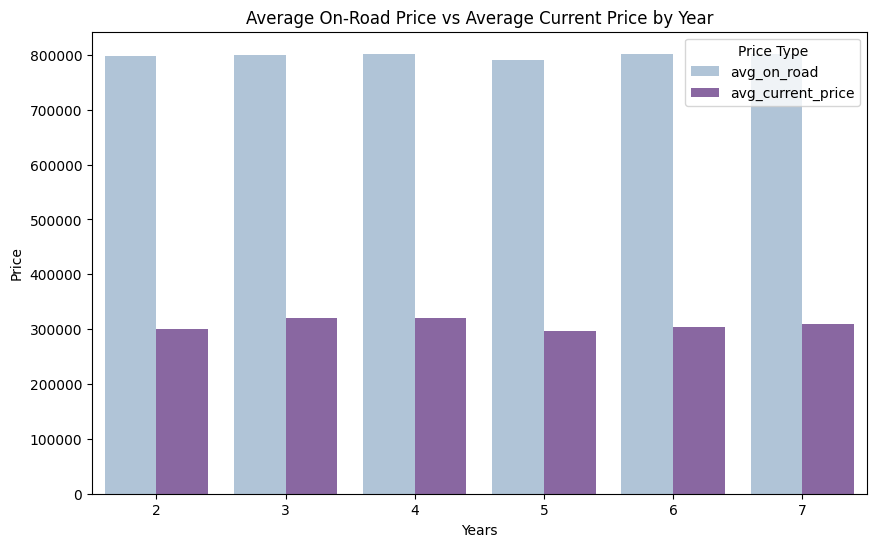

In [ ]:
avg_on_road = df.groupby('years')['on road now'].mean().round(2)
avg_current_price = df.groupby('years')['current price'].mean().round(2)
avg_prices = pd.DataFrame({
    "years": avg_on_road.index,
    "avg_on_road": avg_on_road.values,
    "avg_current_price": avg_current_price.values
})

avg_prices_melted = avg_prices.melt(id_vars="years",
                                    value_vars=["avg_on_road", "avg_current_price"],
                                    var_name="Price Type",
                                    value_name="Price")

plt.figure(figsize=(10,6))
palette = sns.color_palette('BuPu' , 2)
sns.barplot(x="years", y="Price", hue="Price Type", data=avg_prices_melted , palette = palette)
plt.title("Average On-Road Price vs Average Current Price by Year")
plt.xlabel("Years")
plt.ylabel("Price")
plt.show()

/tmp/ipython-input-836618859.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
/tmp/ipython-input-836618859.py:2: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


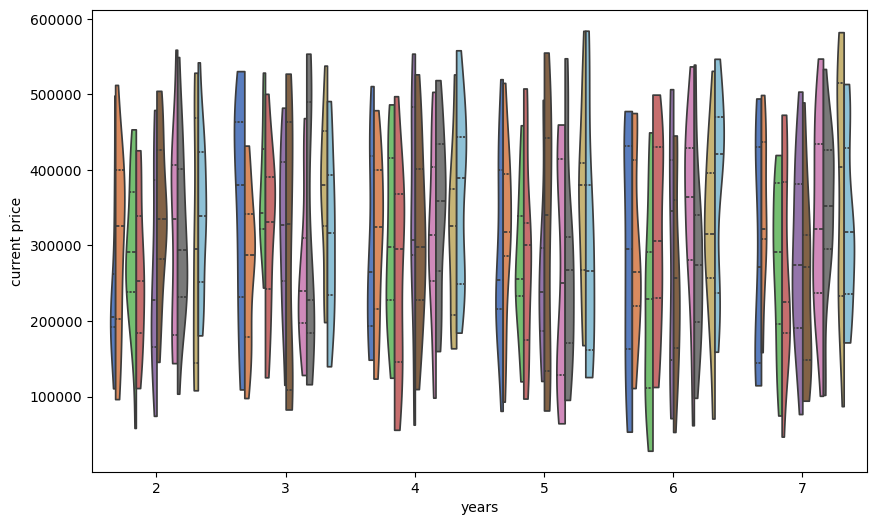

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="years", y="current price", data=df,
    hue="condition", split=True, inner="quartile",
    scale="count", palette="muted", cut=0, bw=0.5 , legend = False
)
plt.show()


In [ ]:
copy_df = df.copy()

**Identifying the features**

In [ ]:
def calculate_vif(df):
    X = copy_df.select_dtypes(include=['float64', 'int64']).copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    vif_copy_df = pd.DataFrame()
    vif_copy_df['Feature'] = X.columns
    vif_copy_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_copy_df.sort_values(by='VIF', ascending=False)



vif_data = calculate_vif(copy_df)
print("Initial VIF values:\n", vif_data)

# Iteratively drop features with VIF > 10
threshold = 10
while vif_data['VIF'].max() > threshold:
    drop_feat = vif_data.iloc[0]['Feature']
    print(f"Dropping '{drop_feat}' with VIF = {vif_data.iloc[0]['VIF']:.2f}")
    copy_df = copy_df.drop(columns=[drop_feat])
    vif_data = calculate_vif(copy_df)

print("\nFinal Selected Features:")
print(copy_df.columns.tolist())

Initial VIF values:
           Feature         VIF
10  current price  210.505749
3              km  180.721706
0     on road old   12.564197
1     on road now   11.785122
5       condition    3.278042
2           years    1.110464
8              hp    1.017503
6         economy    1.013899
7       top speed    1.013337
4          rating    1.009999
9          torque    1.005524
Dropping 'current price' with VIF = 210.51

Final Selected Features:
['on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque']


**Splitting Data for training and testing**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(df.drop("current price" , axis = 1) , df["current price"] , test_size = 0.2 , random_state = 42)

In [ ]:
print(df.columns.tolist())

['on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']


In [87]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [91]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 81030910.70443736
R² Score: 0.9951798797617532


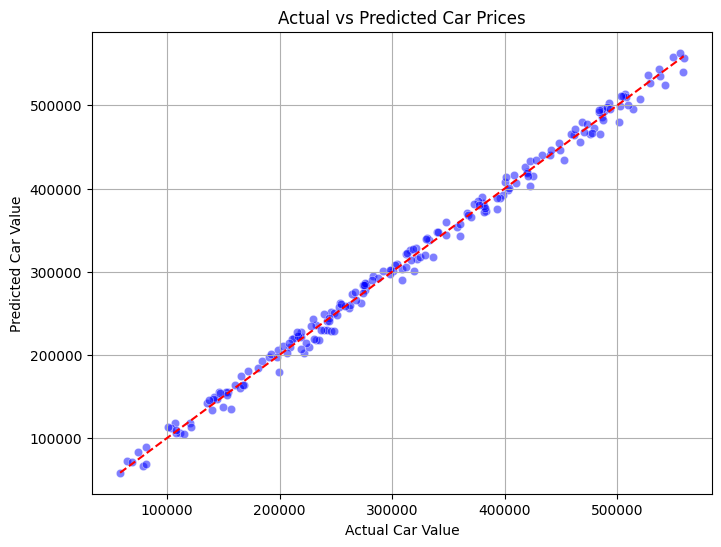

In [92]:
# Plotting
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Car Value")
plt.ylabel("Predicted Car Value")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

# Task
Explain the error in the selected code, fix it, and create a Gradio application to host the car price prediction model.

## Define the prediction function

### Subtask:
Create a Python function that takes the input features for a car and returns the predicted current price using the trained `model`.


**Reasoning**:
Define a function to predict the car price using the trained model and the features from the training data.



In [93]:
def predict_car_price(on_road_old, on_road_now, years, km, rating, condition, economy, top_speed, hp, torque):
    """
    Predicts the current price of a car based on its features.

    Args:
        on_road_old (int): The old on-road price of the car.
        on_road_now (int): The current on-road price of the car.
        years (int): The number of years the car has been used.
        km (int): The total kilometers driven by the car.
        rating (int): The rating of the car.
        condition (int): The condition of the car.
        economy (int): The economy of the car.
        top_speed (int): The top speed of the car.
        hp (int): The horsepower of the car.
        torque (int): The torque of the car.

    Returns:
        float: The predicted current price of the car.
    """
    input_data = pd.DataFrame([[on_road_old, on_road_now, years, km, rating, condition, economy, top_speed, hp, torque]],
                              columns=x_train.columns)
    predicted_price = model.predict(input_data)[0]
    return predicted_price

## Create a gradio interface

### Subtask:
Use the `gradio.Interface` class to build a web interface for your prediction function.


**Reasoning**:
Create a Gradio interface for the prediction function.



In [102]:
iface = gr.Interface(
    fn=predict_car_price,
    inputs=[
        gr.Number(label="On Road Old Price"),
        gr.Number(label="On Road Now Price"),
        gr.Slider(minimum=2, maximum=7, step=1, label="Years"),
        gr.Number(label="Kilometers Driven"),
        gr.Slider(minimum=1, maximum=5, step=1, label="Rating"),
        gr.Slider(minimum=1, maximum=10, step=1, label="Condition"),
        gr.Slider(minimum=8, maximum=15, step=1, label="Economy"),
        gr.Slider(minimum=135, maximum=200, step=1, label="Top Speed"),
        gr.Slider(minimum=50, maximum=120, step=1, label="Horsepower (hp)"),
        gr.Slider(minimum=68, maximum=140, step=1, label="Torque")
    ],
    outputs=gr.Number(label="Predicted Current Price"),
    title="Car Price Prediction Model"
)

**Launching The Gardio-app**

In [103]:
iface.launch(inline=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://869a45f0bc1cad4205.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
